# Load Data

In [1]:
import pandas as pd 
import numpy as np 
import datapane as dp 

messages = pd.read_csv('messages.csv')
messages.head(10)

FROM           TO                 DATE SUBJECT  \
0     Lakshay Sharma  Khuyen Tran  2020-07-26T08:55:49     NaN   
1    Carlos Olivares  Khuyen Tran  2020-07-26T08:33:12     NaN   
2    Carlos Olivares  Khuyen Tran  2020-07-25T22:14:03     NaN   
3  Nguyen Huynh Dong  Khuyen Tran  2020-07-25T19:40:08     NaN   
4    Carlos Olivares  Khuyen Tran  2020-07-25T18:19:18     NaN   
5      Navjiwan Hira  Khuyen Tran  2020-07-25T15:35:48     NaN   
6        Siddiq Syed  Khuyen Tran  2020-07-25T12:01:04     NaN   
7   Kingsley Ihemere  Khuyen Tran  2020-07-25T10:03:40     NaN   
8    Carlos Olivares  Khuyen Tran  2020-07-25T09:36:04     NaN   
9      Navjiwan Hira  Khuyen Tran  2020-07-25T09:12:40     NaN   

                                             CONTENT DIRECTION FOLDER  
0  Hi  Glad to connect with you. Looking forward ...  INCOMING  INBOX  
1  This is amazing Tran, it's wonderful you could...  INCOMING  INBOX  
2  Hi Tran, you'll receive an invitation for the ...  INCOMING  INBOX  
3  Thank you for accepting my connection request!...  INCOMING  INBOX  
4  Hi Tran, great! Which time zone are you curren...  INCOMING  INBOX  
5                                  Same here, Khuyen  INCOMING  INBOX  
6  Hi Khuyen, Glad to connect with you. I really ...  INCOMING  INBOX  
7      Thank you for accepting my connection request  INCOMING  INBOX  
8  Hi Tran, I'm very glad you are interested. It ...  INCOMING  INBOX  
9  Dear Khuyen   Thank you for accepting my invit...  INCOMING  INBOX

In [2]:
figs = []
figs.append(dp.Markdown('# LinkedIn Messages'))
figs.append(dp.Table(messages.head(10)))

In [2]:
from pandas_profiling import ProfileReport

messages.profile_report()

In [3]:
import plotly.express as px 

fig = px.line(messages.groupby('DATE').count().sort_values(by='DATE').reset_index(), 
       x='DATE',
       color='DIRECTION', 
       title='Number of messages overtime')

fig

In [4]:
figs.append(dp.Plot(fig))

In [5]:
#Drop message without any content 
messages = messages.dropna(subset=['CONTENT'])
messages = messages.CONTENT

# Language Detection

In [6]:

text = 'This is an english text.'
doc = nlp(text)
# document level language detection. Think of it like average language of the document!
print(doc._.language)
# sentence level language detection
for sent in doc.sents:
   print(sent, sent._.language)

{'language': 'en', 'score': 0.9999949299053127}
This is an english text. {'language': 'en', 'score': 0.9999965883903983}


In [7]:
doc = nlp('Đây là Tiếng Việt')
# document level language detection. Think of it like average language of the document!
print(doc._.language)
# sentence level language detection
for sent in doc.sents:
   print(sent, sent._.language)

{'language': 'vi', 'score': 0.9999994635236511}
Đây là Tiếng Việt {'language': 'vi', 'score': 0.9999992467443968}


In [8]:
def is_english(nlp, text):
    '''Detect whether a text is English'''

    return nlp(text)._.language['language'] == 'en'


def extract_english_text(nlp, messages):
    '''Extract English text'''

    return [text for text in messages if is_english(nlp, text)]

In [23]:
english_messages = extract_english_text(nlp, messages)

KeyboardInterrupt: 

In [24]:
english_messages

['Hi  Glad to connect with you. Looking forward to learn from you ',
 "This is amazing Tran, it's wonderful you could experience that part of Mexico. Yes, I was born in Guadalajara, and lived in Morelia when I was a kid. I visited Guanajuato just a couple of times. What is even better, I have been living in Japan and Singapore for many years, and about 6 months in Hà Nội. I was amazed about the tons of similarities between Vietnam and Mexico ",
 "Hi Tran, you'll receive an invitation for the video call, likely arranged for your Monday evening. BTW, I saw you were in  Guanajuato! How did you like Mexico?",
 "Thank you for accepting my connection request! I reached out to get a sense of the day-to-day life of a data analyst. I'm a data analyst going through a remote online program to solidify my data analysis skills in Excel, SQL, Tableau, and Python. I know that I have a lot to learn about this new career, which is why I'm writing to you now. As you've been working in this industry for 

# Named Entity

In [11]:
import spacy 
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pprint import pprint
nlp = spacy.load("en_core_web_sm")

In [17]:
messages.CONTENT[1]

"This is amazing Tran, it's wonderful you could experience that part of Mexico. Yes, I was born in Guadalajara, and lived in Morelia when I was a kid. I visited Guanajuato just a couple of times. What is even better, I have been living in Japan and Singapore for many years, and about 6 months in Hà Nội. I was amazed about the tons of similarities between Vietnam and Mexico "

In [14]:
message1 = nlp(messages.CONTENT[1])

In [16]:
pprint([(word, word.label_) for word in message1.ents])

[(Tran, 'ORG'),
 (Mexico, 'GPE'),
 (Guadalajara, 'GPE'),
 (Morelia, 'GPE'),
 (Guanajuato, 'PERSON'),
 (Japan, 'GPE'),
 (Singapore, 'GPE'),
 (many years, 'DATE'),
 (about 6 months, 'DATE'),
 (Hà Nội, 'ORG'),
 (tons, 'QUANTITY'),
 (Vietnam, 'GPE'),
 (Mexico, 'GPE')]


In [18]:
displacy.serve(message1, style='ent')

/home/khuyentran/anaconda3/envs/scraping/lib/python3.8/site-packages/spacy/displacy/__init__.py:94: UserWarning:

[W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.




Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [25]:
all_messages = nlp(' '.join(english_messages))

In [26]:
labels = [x.label_ for x in all_messages.ents]
label_counter = Counter(labels)

def counter_to_df(counter):
    counter_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()\
    .rename(columns={0:'Count'}).sort_values(by='Count', ascending=False)

    return counter_df
counter_df = counter_to_df(label_counter)

In [27]:
fig = px.bar(counter_df,
      x='index',
      y='Count',
    title='Named Entity')
fig

In [28]:
figs.append(dp.Plot(fig))

# Preprocess

In [29]:
import re, string, unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def remove_html(words):
    '''Remove message with html'''
    return re.sub(r'^<p.*</p>', '', words)

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    return [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in words]

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return [word.lower() for word in words]

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    return [re.sub(r'[^\w\s]', '', word) for word in words]

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    return [p.number_to_words(word) if word.isdigit() else word for word in words]

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    return [word for word in words if word not in stopwords.words('english')]

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, pos='v') for word in words]

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    # Remove space
    words = ' '.join(words).replace('  ', ' ').strip().split(' ')
    try: 
        words.remove('')
    except:
        pass 
   
    return words

def preprocess(sample):
    sample = remove_html(sample)
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    # Tokenize
    words = nltk.word_tokenize(sample)

    # Normalize
    words = normalize(words)
    #return sample
    return ' '.join(words)



In [30]:
processed = [preprocess(message) for message in english_messages]

In [31]:
# Remove empty string
while("" in processed) : 
    processed.remove("")       

# Count words

In [67]:
from collections import Counter
word_counter = Counter(' '.join(processed).split())

In [68]:
wordcounter_df = counter_to_df(word_counter)

In [69]:
wordcounter_df

index  Count
0                hi    781
105           would    741
49            thank    656
87             time    607
58             data    584
...             ...    ...
3805       produced      1
1262   deliverables      1
1261        solicit      1
3813         reload      1
5910  considerating      1

[5911 rows x 2 columns]

In [156]:
fig = px.bar(pd.DataFrame.from_dict(wordcounter_df[:30]),
      x='index',
      y='Count')
fig

In [157]:
figs.append(dp.Plot(fig))

In [107]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


def make_wordcloud(new_text):
    ''''funciton to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False).generate(new_text) 
    
    #wordcloud.recolor(color_func = grey_color_func)

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

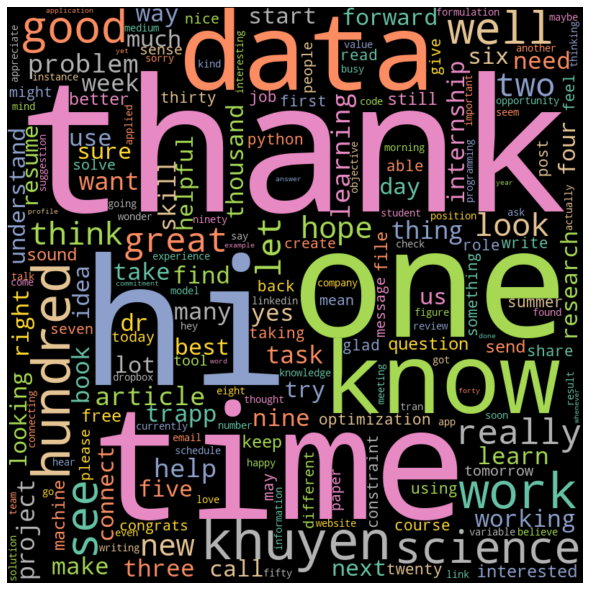

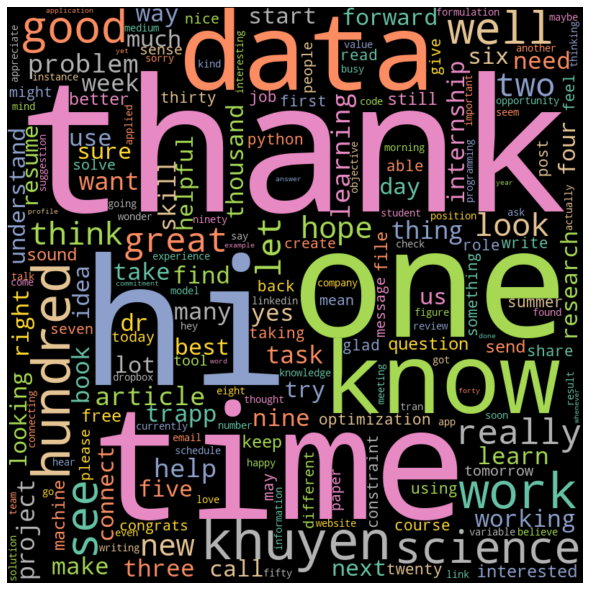

In [110]:
word_cloud = make_wordcloud(' '.join(processed))
word_cloud

In [158]:
figs.append(dp.Plot(word_cloud))

# Sentiment Analysis

In [118]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentence = 'I love this weather'
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [119]:
def predict_sentiment(sentence):
    
    sentiment_dict = sid.polarity_scores(sentence)
    
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return ("Positive", round(sentiment_dict['pos']*100, 2))
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return ("Negative", round(sentiment_dict['neg']*100, 2))
  
    else : 
        return ("Neutral", round(sentiment_dict['neu']*100, 2))
        


In [113]:
processed[3]

'thank accepting connection request reached get sense daytoday life data analyst data analyst going remote online program solidify data analysis skills excel sql tableau python know lot learn new career writing working industry hoping learn journey data analyst thank hope chat soon dong nguyen_dongks yahoofr'

In [120]:
predict_sentiment(processed[3])

('Positive', 31.8)

In [65]:
predict_sentiment('I am so sad')

('Negative', 62.9)

In [66]:
predict_sentiment('It is super useful')

('Positive', 77.3)

In [121]:
predict_sentiment('It is just okay')

('Positive', 38.8)

In [124]:
sentiment = [predict_sentiment(message) for message in processed]

In [125]:
sentiment_df = pd.concat([pd.DataFrame(processed, columns=['Message']), pd.DataFrame(sentiment, columns=['Sentiment', 'Confident'])], axis=1)
sentiment_df.head(10)

Message Sentiment  Confident
0              hi glad connect looking forward learn  Positive       37.5
1  amazing tran wonderful could experience part m...  Positive       40.9
2  hi tran receive invitation video call likely a...  Positive       15.2
3  thank accepting connection request reached get...  Positive       31.8
4                  hi tran great time zone currently  Positive       45.1
5  hi khuyen glad connect really like posts artic...  Positive       50.3
6                 thank accepting connection request  Positive       71.8
7  hi tran glad interested challenging good proje...  Positive       69.3
8  dear khuyen thank accepting invitation connect...  Positive       65.8
9   topics would suggest khuyen would love hear side  Positive       37.5

In [159]:
import plotly.express as px 

fig = px.histogram(sentiment_df, 
      x='Sentiment',
        title='Sentiment in my LinkedIn Message')
fig

In [160]:
figs.append(dp.Plot(fig))

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualise_sentiments(sentence):
    
    data = {
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
}
    f, ax = plt.subplots()
    
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")
    return f 

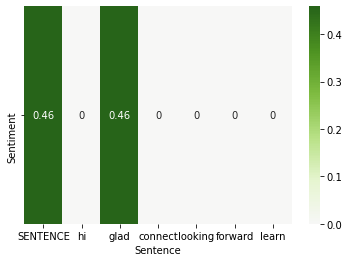

In [165]:
sentence = sample = list(sentiment_df[sentiment_df['Sentiment'] == 'Positive'].Message)[0]
plot = visualise_sentiments(sentence)

In [166]:
figs.append(dp.Plot(fig))

In [162]:
sample = list(sentiment_df[sentiment_df['Sentiment'] == 'Negative'].Message)[2]

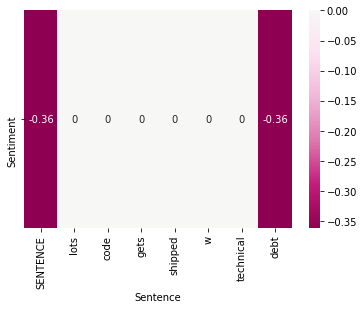

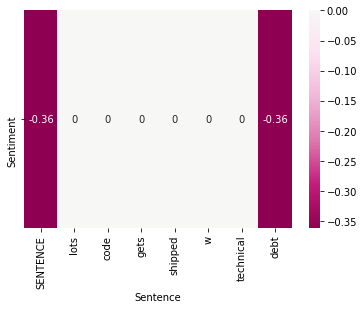

In [163]:
fig = visualise_sentiments(sample)
fig

In [164]:
figs.append(dp.Plot(fig))

# Create a Report for the Plots

In [167]:
dp.Report(*figs).publish(name='Linkedin_message')